In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import datetime
import time
from selenium import webdriver

from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [3]:
def getSoup(url):
    resp=requests.get(url)
    resp.encoding='utf-8-sig'
    if resp.status_code==200:
        soup=BeautifulSoup(resp.text,'lxml')
        return soup
    return None

In [11]:
url='https://www.etax.nat.gov.tw/etw-main/web/ETW183W1/'

In [5]:
url_api='https://www.google-analytics.com/j/collect'

In [6]:
formData={
'v': '1',
'_v': 'j85',
'a': '1038475265',
't': 'pageview',
'_s': '1',
'dl': 'https%3A%2F%2Fwww.etax.nat.gov.tw%2Fetw-main%2Fweb%2FETW183W1%2F',
'ul': 'zh-tw',
'de': 'UTF-8',
'dt': '%E7%B5%B1%E4%B8%80%E7%99%BC%E7%A5%A8%E4%B8%AD%E7%8D%8E%E8%99%9F%E7%A2%BC-%E8%B2%A1%E6%94%BF%E9%83%A8%E7%A8%85%E5%8B%99%E5%85%A5%E5%8F%A3%E7%B6%B2',
'sd': '24-bit',
'sr': '2207x1242',
'vp': '1366x1105',
'je': '0',
'_u': 'AACAAEABAAAAAC~',
'jid': '102648991',
'gjid': '970164996',
'cid': '123978521.1599143311',
'tid': 'UA-112407743-1',
'_gid': '1667999604.1599143311',
'_r': '1',
'z': '1313789820'
}

In [7]:
soup=getSoup(url)
trs=soup.find(id="tablet01").find('tbody').find_all('tr')
trs

[<tr>
 <td headers="seqItem">1</td>
 <td headers="title">
 <!-- static page --> <a href="/etw-main/web/ETW183W3_10905" title="連結到109年05-06月期統一發票特別獎及特獎中獎清冊">109年05-06月期統一發票特別獎及特獎中獎清冊</a> </td>
 </tr>,
 <tr>
 <td headers="seqItem">2</td>
 <td headers="title">
 <!-- static page --> <a href="/etw-main/web/ETW183W2_10905" title="連結到109年05月、06月">109年05月、06月</a> </td>
 </tr>,
 <tr>
 <td headers="seqItem">3</td>
 <td headers="title">
 <!-- static page --> <a href="/etw-main/web/ETW183W3_10903" title="連結到109年03-04月期統一發票特別獎及特獎中獎清冊">109年03-04月期統一發票特別獎及特獎中獎清冊</a> </td>
 </tr>,
 <tr>
 <td headers="seqItem">4</td>
 <td headers="title">
 <!-- static page --> <a href="/etw-main/web/ETW183W2_10903" title="連結到109年03月、04月">109年03月、04月</a> </td>
 </tr>,
 <tr>
 <td headers="seqItem">5</td>
 <td headers="title">
 <!-- static page --> <a href="/etw-main/web/ETW183W3_10901" title="連結到109年01-02月期統一發票特別獎及特獎中獎清冊">109年01-02月期統一發票特別獎及特獎中獎清冊</a> </td>
 </tr>,
 <tr>
 <td headers="seqItem">6</td>
 <td headers="title"

In [13]:
link_list=[]
for tr in trs:
    if '中獎清冊' in tr.find('a').text:
        #print(tr.find('a').text)
        link_list.append('https://www.etax.nat.gov.tw/'+tr.find('a')['href'])
link_list

['https://www.etax.nat.gov.tw//etw-main/web/ETW183W3_10905',
 'https://www.etax.nat.gov.tw//etw-main/web/ETW183W3_10903',
 'https://www.etax.nat.gov.tw//etw-main/web/ETW183W3_10901',
 'https://www.etax.nat.gov.tw//etw-main/web/ETW183W3_10811',
 'https://www.etax.nat.gov.tw//etw-main/web/ETW183W3_10809',
 'https://www.etax.nat.gov.tw//etw-main/web/ETW183W3_10807',
 'https://www.etax.nat.gov.tw//etw-main/web/ETW183W3_10805',
 'https://www.etax.nat.gov.tw//etw-main/web/ETW183W3_10803',
 'https://www.etax.nat.gov.tw//etw-main/web/ETW183W3_10801',
 'https://www.etax.nat.gov.tw//etw-main/web/ETW183W3_10711',
 'https://www.etax.nat.gov.tw//etw-main/web/ETW183W3_10709',
 'https://www.etax.nat.gov.tw//etw-main/web/ETW183W3_10707',
 'https://www.etax.nat.gov.tw//etw-main/web/ETW183W3_10705',
 'https://www.etax.nat.gov.tw//etw-main/web/ETW183W3_10703',
 'https://www.etax.nat.gov.tw//etw-main/web/ETW183W3_10701',
 'https://www.etax.nat.gov.tw//etw-main/web/ETW183W3_10611',
 'https://www.etax.nat.g

In [40]:
# 抓取直中獎清冊網址

url='https://www.etax.nat.gov.tw/etw-main/web/ETW183W1/'
def getLinkList(url):
    soup=getSoup(url)
    trs=soup.find(id="tablet01").find('tbody').find_all('tr')
    
    link_list=[]
    for tr in trs:
        if '中獎清冊' in tr.find('a').text:
            #print(tr.find('a').text)
            link_list.append('https://www.etax.nat.gov.tw/'+tr.find('a')['href'])
    return link_list


In [36]:
# 抓1000萬元的名冊

def get1000(link_list):
       
    datas_1000=[]
    data=[]
    count=0
    for link in link_list:
        soup=getSoup(link)
        tds=soup.find(id="fbonly").find_all('td')
        for td in tds:
            if count%5==0:
                pass
            else:
                data.append(td.text)
            if count%5==4:
                datas_1000.append(data)
                data=[]
            count+=1
    return datas_1000

In [41]:
datas_1000=get1000(link_list)
datas_1000

[['**03016191', '味美小吃店(店招：八方雲集)', '臺北市北投區北投路2段5號', '鍋貼*10、湯品*1，共88元'],
 ['**03016191',
  '來來超商股份有限公司第三二六分公司(店招：OK便利商店)',
  '臺北市北投區石牌路1段39巷124號1樓',
  '飲品*1、食品*2，共65元'],
 ['**03016191',
  'Google Asia Pacific Pte Ltd(店招：Google Play)',
  '臺北市信義區',
  '應用程式*1，300元'],
 ['**03016191', '遠傳電信股份有限公司(店招：遠傳電信) ', '臺北市大安區敦化南路2段207號28樓', '電信服務，共2,017元'],
 ['**03016191', '東辰瓦斯器具有限公司(店招：國勝瓦斯器具)', '新北市永和區得和路19號1樓', '用品*3，共21,800元'],
 ['**03016191',
  '全聯實業股份有限公司新店建國分公司(店招：全聯福利中心)',
  '新北市新店區大豐里建國路210號1樓',
  '食品*6，共394元'],
 ['**03016191', '睿亞茶飲(店招：COCO都可茶飲 )', '新竹縣湖口鄉中正路一段2號1樓', '飲品*2，共90元'],
 ['**03016191',
  '統一超商股份有限公司桃園市第七八六分公司(店招：7-11)',
  '桃園市楊梅區中山里中山北路１段360、362號1樓',
  '飲品*1、食品*1，共60元'],
 ['**03016191',
  '全家便利商店股份有限公司板橋光復分公司(店招：FamilyMart)',
  '新北市板橋區埔墘里中山路2段503號1樓',
  '飲品*1，20元'],
 ['**03016191',
  '統一精工股份有限公司和美二站加油站(店招：Smile速邁樂加油中心 和美二站)',
  '彰化縣和美鎮竹園里6鄰彰新路四段31號',
  '洗車費，190元'],
 ['**03016191',
  '廣源茶坊(店招：KEBUKE可不可熟成紅茶)',
  '南投縣竹山鎮竹山里4鄰集山路三段924號1樓',
  '飲品*5、用品*1，共151元'],
 ['**03016191',
  '振來發囍

In [42]:
# 抓200萬元的名冊

def get200(link_list):
       
    datas_200=[]
    data=[]
    count=0
    for link in link_list:
        soup=getSoup(link)
        tds=soup.find(id="fbonly_200").find_all('td')
        for td in tds:
            if count%5==0:
                pass
            else:
                data.append(td.text)
            if count%5==4:
                datas_200.append(data)
                data=[]
            count+=1
    return datas_200


In [43]:
datas_200=get200(link_list)
datas_200

[['**62474899',
  '統一超商股份有限公司台北市第八二八分公司(店招：7-11)',
  '臺北市士林區延平北路6段122、124號',
  '酒品*10、食品*1，共354元'],
 ['**62474899',
  '統一超商股份有限公司台北市第一五五分公司(店招：7-11)',
  '臺北市中山區林森北路380－1號',
  '食品*2、菸品*2，共305元'],
 ['**62474899',
  '全聯實業股份有限公司天母中山北分公司(店招：全聯福利中心)',
  '臺北市士林區中山北路7段154巷6號1、2樓',
  '用品*2，共151元'],
 ['**62474899', '大苑子開發股份有限公司北投光明分公司(店招：大苑子)', '臺北市北投區光明路200號1樓', '飲品*1，80元'],
 ['**62474899', '佰億萬國際有限公司(店招：愛心聯盟生鮮超市)', '桃園市桃園區成功里鎮撫街136號1樓', '影印，2元'],
 ['**62474899',
  '統一超商股份有限公司新北市第一四二分公司(店招：7-11)',
  '新北市永和區秀朗路2段128號1樓',
  '菸品*1，100元'],
 ['**62474899',
  '全家便利商店股份有限公司基隆華復分公司(店招：FamilyMart)',
  '基隆市中山區通化里中華路2號1樓',
  '食品*2、飲品*1，共149元'],
 ['**62474899', '經國能源股份有限公司(店招：中油)', '新北市土城區大安里中央路三段83號', '汽油、尿素，共961元'],
 ['**62474899',
  '萊爾富國際股份有限公司第四五二九分公司(店招：萊爾富)',
  '新北市淡水區新市二路2段52、56、58、60號1樓',
  '飲品*3、食品*2，共121元'],
 ['**62474899',
  '惠康百貨股份有限公司立德分公司(店招：頂好)',
  '新北市土城區立德路105號1樓',
  '食品*6、飲品*6，共298元'],
 ['**62474899', '熊邦商店有限公司(店招：歡樂熊)', '花蓮縣吉安鄉慶豐村中山路3段576號1樓', '飲品*1、食品*1，共305元'],
 ['**62474899',
  '全家便利

In [45]:
df1000=pd.DataFrame(datas_1000,columns=['發票號碼','開立發票營業人','營業地址','交易項目'])
df1000

,發票號碼,開立發票營業人,營業地址,交易項目
0,**03016191,味美小吃店(店招：八方雲集),臺北市北投區北投路2段5號,鍋貼*10、湯品*1，共88元
1,**03016191,來來超商股份有限公司第三二六分公司(店招：OK便利商店),臺北市北投區石牌路1段39巷124號1樓,飲品*1、食品*2，共65元
2,**03016191,Google Asia Pacific Pte Ltd(店招：Google Play),臺北市信義區,應用程式*1，300元
3,**03016191,遠傳電信股份有限公司(店招：遠傳電信),臺北市大安區敦化南路2段207號28樓,"電信服務，共2,017元"
4,**03016191,東辰瓦斯器具有限公司(店招：國勝瓦斯器具),新北市永和區得和路19號1樓,"用品*3，共21,800元"
...,...,...,...,...
614,JF87165494,全家便利商店股份有限公司桃園東陽分公司,桃園縣桃園市東門里9鄰成功路2段,巧克力
615,GU87165494,派卜樂時尚國際有限公司龍潭營業所,桃園縣龍潭鄉中山村北龍路,證件套
616,GV87165494,鍋藝小吃店,臺中市西屯區福雅里臺中港路3段,餐點
617,HZ87165494,三商行股份有限公司太平大源分公司,臺中市太平區豐年里大源路,沐浴乳等


In [46]:
df200=pd.DataFrame(datas_200,columns=['發票號碼','開立發票營業人','營業地址','交易項目'])
df200

,發票號碼,開立發票營業人,營業地址,交易項目
0,**62474899,統一超商股份有限公司台北市第八二八分公司(店招：7-11),臺北市士林區延平北路6段122、124號,酒品*10、食品*1，共354元
1,**62474899,統一超商股份有限公司台北市第一五五分公司(店招：7-11),臺北市中山區林森北路380－1號,食品*2、菸品*2，共305元
2,**62474899,全聯實業股份有限公司天母中山北分公司(店招：全聯福利中心),臺北市士林區中山北路7段154巷6號1、2樓,用品*2，共151元
3,**62474899,大苑子開發股份有限公司北投光明分公司(店招：大苑子),臺北市北投區光明路200號1樓,飲品*1，80元
4,**62474899,佰億萬國際有限公司(店招：愛心聯盟生鮮超市),桃園市桃園區成功里鎮撫街136號1樓,影印，2元
...,...,...,...,...
581,JF02818106,全家便利商店股份有限公司台中向心分公司,臺中市南屯區田心里文心路1段,泡麵
582,GW02818106,建欣茶行,臺中市南屯區文心里大墩路,飲料
583,HV02818106,統一超商股份有限公司台南縣第187分公司,臺南市永康區西灣里24鄰永大路2段,口香糖
584,HU02818106,統一超商股份有限公司屏東縣第13分公司,屏東縣屏東市北興里廣東路,菸品


In [90]:
# 資料統計

def getCityData(df):
    citys=[]
    for data in df['營業地址']:
        citys.append(data[:3])

    citys_dict={}
    for city in set(citys):
        citys_dict[city]=citys.count(city)
    return citys_dict

In [56]:

explode=[]
for i in citys_dict.values():
    if i==max(citys_dict.values()):
        explode.append(0.2)
    else:
        explode.append(0)
explode

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

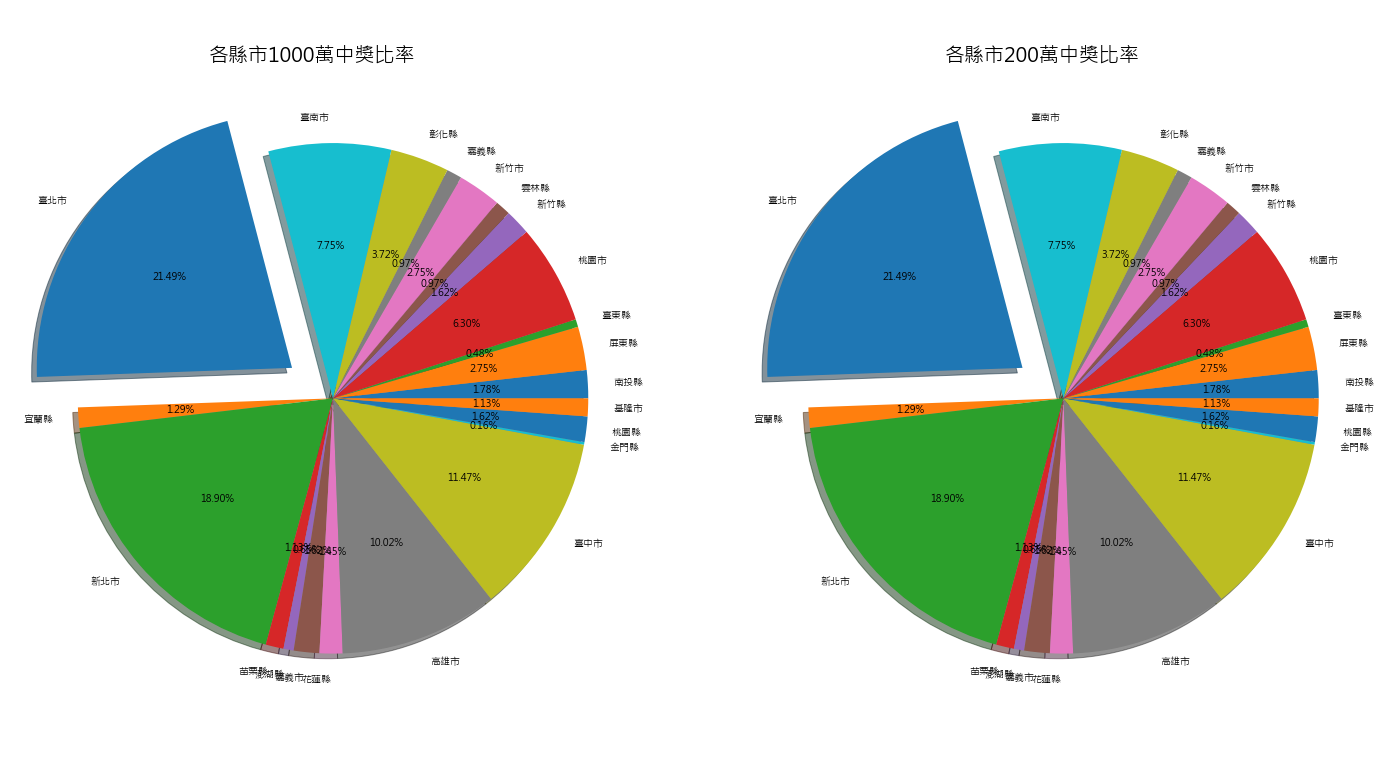

In [101]:
plt.figure(figsize=(24,14))

plt.subplot(1,2,1)

getCityData(df1000)
explode=[]
for i in citys_dict.values():
    if i==max(citys_dict.values()):
        explode.append(0.2)
    else:
        explode.append(0)
index=citys_dict.keys()
colors,texts,pct=plt.pie(citys_dict.values(),labels=index,explode=explode,shadow=True,textprops={'fontsize':10},autopct='%.2f%%')
plt.axis('equal')
plt.title('各縣市1000萬中獎比率',fontsize=20,y=0.92)


plt.subplot(1,2,2)

getCityData(df200)
explode=[]
for i in citys_dict.values():
    if i==max(citys_dict.values()):
        explode.append(0.2)
    else:
        explode.append(0)
index=citys_dict.keys()
plt.pie(citys_dict.values(),labels=index,explode=explode,shadow=True,textprops={'fontsize':10},autopct='%.2f%%')
plt.axis('equal')
plt.title('各縣市200萬中獎比率',fontsize=20,y=0.92)


plt.show()